# Prueba técnica

Parte I – Python

Archivo: “Flight_Predictions.csv”

Descripción de los datos
El dataset contiene información de reservas de vuelos realizados en la página web Easemytrip, vuelos realizados entre las ciudadades principales de la India.

Objetivo: Predecir el precio de los tiquetes aéreos

Actividades:

Explorar la data:
- Limpiar la data si es necesario
- ¿Cuáles son las ciudades de origen?
- ¿Cuántas aerolíneas son?
- ¿Cuál es el precio promedio de cada aerolínea según la clase?

Modelo de machine learning
- Aplicar al menos 2 modelos de regresión para predecir el precio del tiquete del vuelo, ¿Cuál modelo de regresión se adapta mejor? ¿por qué?

# Diccionario

| Variable       |        Significado     | 
|-----------------------|-----------------------|
| Airline            |        Aerolinea del vuelo      |
| Flight         |        Número del vuelo      |
| Source city            |        Ciudad origen del vuelo     |
| Departure time   |        Periodo de tiempo de la salida del vuelo: 'Evening', 'Early_Morning','Morning','Afternoon','Night','Late Night'      |
| Stops  |        Número de escalas: 0, 1, 2 o más|
| Arrival time   |        Hora de llegada a la ciudad destino     |
| Destination city      |        Ciudad destino    |
| Days left |        Diferencia de días entre la fecha de viaje y la fecha en que el tiquete fue reservado    |
|Price |      Precio del tiquete aéreo      |
| Class              |      Económica o Business    |
| Duration   |      Duración del vuelo    |

# Solución

In [27]:
# importando librerías a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## Cargando el dataset

In [2]:
# cargando dataset en un dataframe
df = pd.read_csv('Flight_Predictions.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# visualizando la información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
# visualizando valores faltantes en la data
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Podemos visualizar que el dataset contiene 300153 filas y 12 columnas. Además podemos notar que no existen valores faltantes en la data, por lo que el procesamiento de datos se basará en la eliminación de columnas que no serán relevantes para el modelo.

## Limpieza y transformación de los datos

Se procede a eliminar las columnas Unnamed: 0 y flight ya que básicamente son identificadores y no nos aportaran nada al modelo.

In [5]:
# eliminando columnas Unnamed: 0 y flight
df.drop(columns=['Unnamed: 0', 'flight'], inplace=True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Al tener nuestro dataset listo para el análisis, procedemos a responder las preguntas de la prueba.

## ¿Cuáles son las ciudades de origen?

In [6]:
# visualizando valores unicos de la columna source_city
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

Como podemos visualizar, las ciudades de origen son:
- Delhi.
- Mumbai.
- Bangalore.
- Kolkata.
- Hyderabad.
- Chennai.

## ¿Cuántas aerolíneas son?

In [7]:
# visualizando las aerolineas
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

Se evidencia que en la muestra de los datos existen 6 aerolíneas, las cuales son:
- SpiceJet.
- AirAsia.
- Vistara.
- GO_FIRTS.
- Indigo.
- Air_India.

## ¿Cuál es el precio promedio de cada aerolínea según la clase?

In [8]:
df.groupby(['airline', 'class'])['price'].mean()

airline    class   
AirAsia    Economy      4091.072742
Air_India  Business    47131.039212
           Economy      7313.682169
GO_FIRST   Economy      5652.007595
Indigo     Economy      5324.216303
SpiceJet   Economy      6179.278881
Vistara    Business    55477.027777
           Economy      7806.943645
Name: price, dtype: float64

Acá se puede evidenciar el precio promedio de las aerolíneas según la clase.

## Creación de modelo de machine learning

Antes de realizar la construcción del modelo debemos convertir las variables categóricas en variables númericas.

In [9]:
# visualizando los valores de las columnas categóricas
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df[col].unique()}")

airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops: ['zero' 'one' 'two_or_more']
arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class: ['Economy' 'Business']


In [10]:
# transformando variables categoricas a numericas - labelEncoding
for col in df.select_dtypes(include=['object']).columns:
    
    label_encoder = preprocessing.LabelEncoder()

    label_encoder.fit(df[col].unique())

    df[col] = label_encoder.transform(df[col])

    print(f"{col}: {df[col].unique()}")

airline: [4 0 5 2 3 1]
source_city: [2 5 0 4 3 1]
departure_time: [2 1 4 0 5 3]
stops: [2 0 1]
arrival_time: [5 4 1 0 2 3]
destination_city: [5 0 4 3 1 2]
class: [1 0]


Al tener nuestras variables listas, procedemos a realizar el modelo. Como es un problema de regresión, se deben usar modelos de regresión.

## Train Test Split

Primeramente procedemos a dividir nuestra data en datos de entrenamiento y en datos de prueba.

In [11]:
# creando variables
X = df.drop("price",axis=1)
y = df["price"]
# dividiendo los datos en datos de entrenamiento y datos de prueba con una semilla 42 para poder replicar los resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Usaré los siguientes modelos de aprendizaje automático para predecir el precio de las casas:
- Regresión lineal polinomial.
- Ridge Regression.
- Random Forest Regression.

## Regresión Ridge

In [12]:
# creando modelo con un alpha de 0.001
rr = Ridge(alpha = 0.001)

In [13]:
# entrenando el modelo con los datos de prueba
rr.fit(X_train, y_train)

Ridge(alpha=0.001)

In [14]:
rr.score(X_train, y_train)

0.9045877099195363

Para terminos de precisión con los datos de prueba, se obtiene un 90.45%

## Evaluando el modelo

In [15]:
rr_pred = rr.predict(X_test)
r2_score(y_test, rr_pred)

0.9046540517481271

Al procesar los datos de prueba con el modelo ya entrenado, obtuvimos un R2_score de 90.46%

## Random Forest Regression

In [16]:
# creando el modelo usando una semilla de 0 y 100 arboles
rfr = RandomForestRegressor(n_estimators=100, random_state=0)

In [17]:
# entrenando el modelo con los datos de prueba
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [20]:
rfr.score(X_train, y_train)

0.997528175921213

## Evaluando el modelo

In [19]:
rfr_pred = rfr.predict(X_test)
r2_score(y_test, rfr_pred)

0.9845708162961476

Podemos evidenciar que el modelo obtuvo con los datos de entrenamiento un R2_score de 98.45%

## Comparación de los modelos

### Errores de los modelos

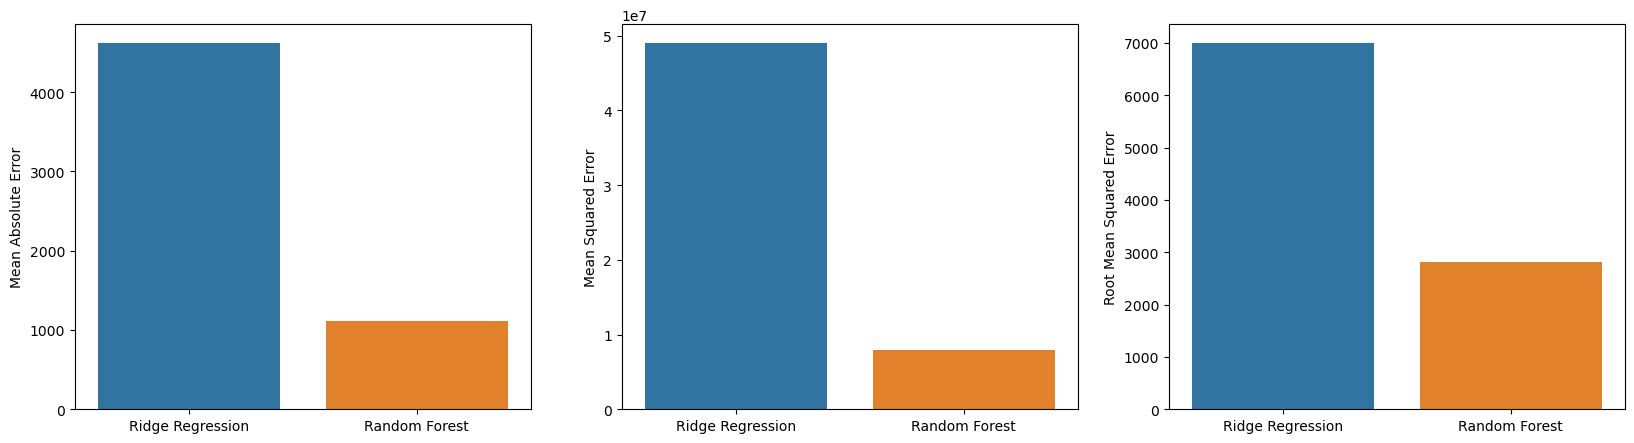

In [25]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.barplot(x=["Ridge Regression","Random Forest"], y=[mean_absolute_error(y_test, rr_pred), mean_absolute_error(y_test, rfr_pred)], ax=ax[0])
sns.barplot(x=["Ridge Regression","Random Forest"], y=[mean_squared_error(y_test, rr_pred), mean_squared_error(y_test, rfr_pred)], ax=ax[1])
sns.barplot(x=["Ridge Regression","Random Forest"], y=[np.sqrt(mean_squared_error(y_test, rr_pred)), np.sqrt(mean_squared_error(y_test, rfr_pred))], ax=ax[2])

ax[0].set_ylabel("Mean Absolute Error")
ax[1].set_ylabel("Mean Squared Error")
ax[2].set_ylabel("Root Mean Squared Error")
plt.show()

A nivel de errores absolutos y cuadraticos, podemos evidenciar que el modelo de Random Forest Regressor presento un mejor rendimiento que el modelo De Ridge

### Accuracy de los modelos

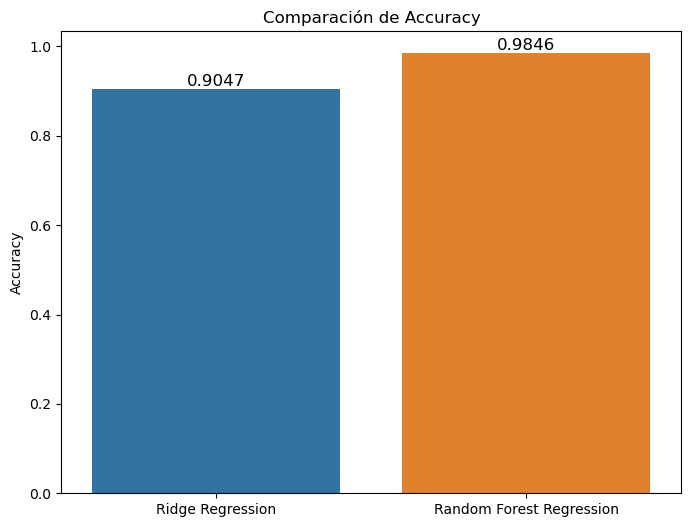

In [28]:
models = ["Ridge Regression", "Random Forest Regression"]
accuracy = [metrics.r2_score(y_test, rr_pred),metrics.r2_score(y_test, rfr_pred)]
plt.figure(figsize=(8,6))
sns.barplot(x=models, y=accuracy)

for i, val in enumerate(accuracy):
    plt.text(i, val, f'{val:.4f}', ha="center", va="bottom", fontsize=12)
    
plt.title("Comparación de Accuracy")
plt.ylabel("Accuracy")
plt.show()

En terminos de Accuracy tambien podemos notar un mejor rendimiento con el Random Forest Regressor, por lo que este será nuestro modelo a usar para las predicciones.

## Sistema de predicción

Se procede a crear un modelo para la predicción de los precios, usando el modelo rfr

In [29]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [34]:
def prediccion_precio (data):
    input_data_as_numpy_array= np.asarray(data)

    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    prediction = rfr.predict(input_data_reshaped)
    
    print(f"El precio es ${prediction[0]:.2f}")

In [35]:
datos_viaje = (4,2,2,2,5,5,1,2.17,1)
prediccion_precio(datos_viaje)

El precio es $9131.72


# Puntos de mejora

- Se puede realizar una normalización en los datos o una estandarización para tener datos más precisos para el entrenamiento.
- Con respecto al LabelEncoding, se puede realizar un mejor mapeo de las caracteristicas para no crear sesgos en los datos.